## Observations and Insights 
-Capomulin, Ramicane are the drug regimens with more measurements taken.  
-There is a strong correlation between the Volume of the tumor and the weight of the mouse.   
-After analizing different specimens under the Capomulin regimen seems like it helps to reduce the volume of the tummor.   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df= pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)


In [2]:
#Display Mouse Metadata
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Display study Results
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
combined_mouse_data_df["Mouse ID"].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data_df = combined_mouse_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
combined_mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_mouse_data_df = combined_mouse_data_df['Mouse ID'].unique()
Cleaned_mouse_data_df

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [9]:
# Checking the number of mice in the clean DataFrame.
number_of_mouse=len(Cleaned_mouse_data_df)
number_of_mouse

249

In [10]:
combined_mouse_data_df = combined_mouse_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
combined_mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [11]:
# Checking the number of mice in the clean DataFrame.
combined_mouse_data_df["Mouse ID"].count()

1888

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#summary statistics for Capomulin
Capomulin_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Capomulin", :]
Capomulin_Drug_mean=Capomulin_Drug_df['Tumor Volume (mm3)'].mean()
Capomulin_Drug_median=Capomulin_Drug_df['Tumor Volume (mm3)'].median()
Capomulin_Drug_var=Capomulin_Drug_df['Tumor Volume (mm3)'].var()
Capomulin_Drug_std=Capomulin_Drug_df['Tumor Volume (mm3)'].std()
Capomulin_Drug_sem=Capomulin_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Ceftamin 
Ceftamin_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Ceftamin", :]
Ceftamin_Drug_mean=Ceftamin_Drug_df['Tumor Volume (mm3)'].mean()
Ceftamin_Drug_median=Ceftamin_Drug_df['Tumor Volume (mm3)'].median()
Ceftamin_Drug_var=Ceftamin_Drug_df['Tumor Volume (mm3)'].var()
Ceftamin_Drug_std=Ceftamin_Drug_df['Tumor Volume (mm3)'].std()
Ceftamin_Drug_sem=Ceftamin_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Infubinol
Infubinol_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Infubinol", :]
Infubinol_Drug_mean=Infubinol_Drug_df['Tumor Volume (mm3)'].mean()
Infubinol_Drug_median=Infubinol_Drug_df['Tumor Volume (mm3)'].median()
Infubinol_Drug_var=Infubinol_Drug_df['Tumor Volume (mm3)'].var()
Infubinol_Drug_std=Infubinol_Drug_df['Tumor Volume (mm3)'].std()
Infubinol_Drug_sem=Infubinol_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Ketapril
Ketapril_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Ketapril", :]
Ketapril_Drug_mean=Ketapril_Drug_df['Tumor Volume (mm3)'].mean()
Ketapril_Drug_median=Ketapril_Drug_df['Tumor Volume (mm3)'].median()
Ketapril_Drug_var=Ketapril_Drug_df['Tumor Volume (mm3)'].var()
Ketapril_Drug_std=Ketapril_Drug_df['Tumor Volume (mm3)'].std()
Ketapril_Drug_sem=Ketapril_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Naftisol
Naftisol_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Naftisol", :]
Naftisol_Drug_mean=Naftisol_Drug_df['Tumor Volume (mm3)'].mean()
Naftisol_Drug_median=Naftisol_Drug_df['Tumor Volume (mm3)'].median()
Naftisol_Drug_var=Naftisol_Drug_df['Tumor Volume (mm3)'].var()
Naftisol_Drug_std=Naftisol_Drug_df['Tumor Volume (mm3)'].std()
Naftisol_Drug_sem=Naftisol_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Placebo
Placebo_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Placebo", :]
Placebo_Drug_mean=Placebo_Drug_df['Tumor Volume (mm3)'].mean()
Placebo_Drug_median=Placebo_Drug_df['Tumor Volume (mm3)'].median()
Placebo_Drug_var=Placebo_Drug_df['Tumor Volume (mm3)'].var()
Placebo_Drug_std=Placebo_Drug_df['Tumor Volume (mm3)'].std()
Placebo_Drug_sem=Placebo_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Propriva
Propriva_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Propriva", :]
Propriva_Drug_mean=Propriva_Drug_df['Tumor Volume (mm3)'].mean()
Propriva_Drug_median=Propriva_Drug_df['Tumor Volume (mm3)'].median()
Propriva_Drug_var=Propriva_Drug_df['Tumor Volume (mm3)'].var()
Propriva_Drug_std=Propriva_Drug_df['Tumor Volume (mm3)'].std()
Propriva_Drug_sem=Propriva_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Ramicane
Ramicane_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Ramicane", :]
Ramicane_Drug_mean=Ramicane_Drug_df['Tumor Volume (mm3)'].mean()
Ramicane_Drug_median=Ramicane_Drug_df['Tumor Volume (mm3)'].median()
Ramicane_Drug_var=Ramicane_Drug_df['Tumor Volume (mm3)'].var()
Ramicane_Drug_std=Ramicane_Drug_df['Tumor Volume (mm3)'].std()
Ramicane_Drug_sem=Ramicane_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Stelasyn
Stelasyn_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Stelasyn", :]
Stelasyn_Drug_mean=Stelasyn_Drug_df['Tumor Volume (mm3)'].mean()
Stelasyn_Drug_median=Stelasyn_Drug_df['Tumor Volume (mm3)'].median()
Stelasyn_Drug_var=Stelasyn_Drug_df['Tumor Volume (mm3)'].var()
Stelasyn_Drug_std=Stelasyn_Drug_df['Tumor Volume (mm3)'].std()
Stelasyn_Drug_sem=Stelasyn_Drug_df['Tumor Volume (mm3)'].sem()

#summary statistics for Zoniferol
Zoniferol_Drug_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == "Zoniferol", :]
Zoniferol_Drug_mean=Zoniferol_Drug_df['Tumor Volume (mm3)'].mean()
Zoniferol_Drug_median=Zoniferol_Drug_df['Tumor Volume (mm3)'].median()
Zoniferol_Drug_var=Zoniferol_Drug_df['Tumor Volume (mm3)'].var()
Zoniferol_Drug_std=Zoniferol_Drug_df['Tumor Volume (mm3)'].std()
Zoniferol_Drug_sem=Zoniferol_Drug_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

#Create new df
Summary_Stat_df=pd.DataFrame({"Drug Regimen":["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
                                  "Tumor Vol mean":[Capomulin_Drug_mean, Ceftamin_Drug_mean, Infubinol_Drug_mean, Ketapril_Drug_mean, Naftisol_Drug_mean, Placebo_Drug_mean, Propriva_Drug_mean, Ramicane_Drug_mean, Stelasyn_Drug_mean, Zoniferol_Drug_mean],
                                  "Tumor Vol median":[Capomulin_Drug_median, Ceftamin_Drug_median, Infubinol_Drug_median, Ketapril_Drug_median, Naftisol_Drug_median, Placebo_Drug_median, Propriva_Drug_median, Ramicane_Drug_median, Stelasyn_Drug_median, Zoniferol_Drug_median],
                                  "Tumor Vol variance":[Capomulin_Drug_var, Ceftamin_Drug_var, Infubinol_Drug_var, Ketapril_Drug_var, Naftisol_Drug_var, Placebo_Drug_var, Propriva_Drug_var, Ramicane_Drug_var, Stelasyn_Drug_var, Zoniferol_Drug_var],
                                  "Tumor Vol Std Dev":[Capomulin_Drug_std, Ceftamin_Drug_std, Infubinol_Drug_std, Ketapril_Drug_std, Naftisol_Drug_std, Placebo_Drug_std, Propriva_Drug_std, Ramicane_Drug_std, Stelasyn_Drug_std, Zoniferol_Drug_std],
                                  "Tumor Vol SEM":[Capomulin_Drug_sem, Ceftamin_Drug_sem, Infubinol_Drug_sem, Ketapril_Drug_sem, Naftisol_Drug_sem, Placebo_Drug_sem, Propriva_Drug_sem, Ramicane_Drug_sem, Stelasyn_Drug_sem, Zoniferol_Drug_sem]
                                  })

#format
Summary_Stat_df['Tumor Vol mean']=Summary_Stat_df['Tumor Vol mean'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol median']=Summary_Stat_df['Tumor Vol median'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol variance']=Summary_Stat_df['Tumor Vol variance'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol Std Dev']=Summary_Stat_df['Tumor Vol Std Dev'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol SEM']=Summary_Stat_df['Tumor Vol SEM'].astype(float).map("{:.2f}".format)
Summary_Stat_df=Summary_Stat_df.groupby("Drug Regimen")
Summary_Stat_df.max()

,Tumor Vol mean,Tumor Vol median,Tumor Vol variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_groups_df=combined_mouse_data_df
drug_groups_df['Tumor Vol mean']=drug_groups_df['Tumor Volume (mm3)']
drug_groups_df['Tumor Vol median']=drug_groups_df['Tumor Volume (mm3)']
drug_groups_df['Tumor Vol variance']=drug_groups_df['Tumor Volume (mm3)']
drug_groups_df['Tumor Vol Std Dev']=drug_groups_df['Tumor Volume (mm3)']
drug_groups_df['Tumor Vol SEM']=drug_groups_df['Tumor Volume (mm3)']

Summary_Stat_df=drug_groups_df.groupby("Drug Regimen").agg({'Tumor Vol mean':'mean',
                                                           'Tumor Vol median':'median',
                                                           'Tumor Vol variance':'var',
                                                           'Tumor Vol Std Dev':'std',
                                                           'Tumor Vol SEM':'sem'})

#format
Summary_Stat_df['Tumor Vol mean']=Summary_Stat_df['Tumor Vol mean'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol median']=Summary_Stat_df['Tumor Vol median'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol variance']=Summary_Stat_df['Tumor Vol variance'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol Std Dev']=Summary_Stat_df['Tumor Vol Std Dev'].astype(float).map("{:.2f}".format)
Summary_Stat_df['Tumor Vol SEM']=Summary_Stat_df['Tumor Vol SEM'].astype(float).map("{:.2f}".format)
Summary_Stat_df  

,Tumor Vol mean,Tumor Vol median,Tumor Vol variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [14]:
combined_mouse_data_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

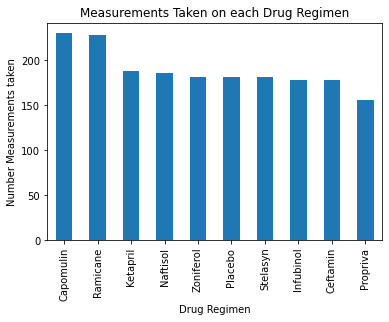

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Meas_Data=combined_mouse_data_df["Drug Regimen"].value_counts()
Meas_Data_Chart = Meas_Data.plot(kind="bar", title="Measurements Taken on each Drug Regimen")
Meas_Data_Chart.set_xlabel("Drug Regimen")
Meas_Data_Chart.set_ylabel("Number Measurements taken")

plt.show()
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

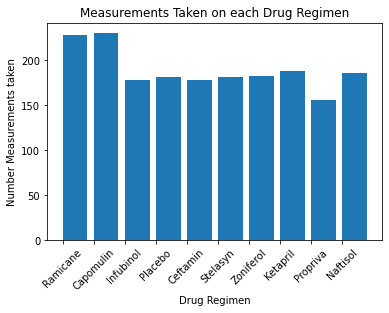

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurement_taken=[]
Drugs_Regimen=combined_mouse_data_df["Drug Regimen"].unique()

for Drug_Regimen in Drugs_Regimen:
        Total_Drug_Regimen_df=combined_mouse_data_df.loc[combined_mouse_data_df["Drug Regimen"] == Drug_Regimen, :]
        measurement_taken.append(Total_Drug_Regimen_df["Drug Regimen"].count())

plt.bar(Drugs_Regimen, measurement_taken,align='edge')
plt.title("Measurements Taken on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Measurements taken")
plt.xticks(rotation=45)

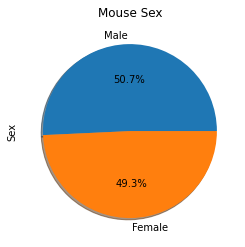

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Data=combined_mouse_data_df["Sex"].value_counts()
Gender_Data_Chart = Gender_Data.plot(kind="pie", shadow=True, autopct='%1.1f%%', startangle=0, title=("Mouse Sex"))
plt.show()

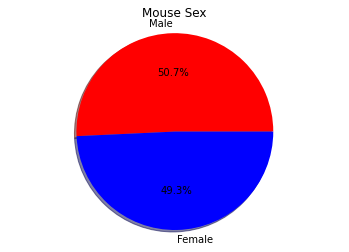

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Genders = []
colors = ["red", "blue"]
Mouse_Sex=combined_mouse_data_df["Sex"].unique()

for Sex in Mouse_Sex:
        Mouse_Sex_df=combined_mouse_data_df.loc[combined_mouse_data_df["Sex"] == Sex, :]
        Genders.append(Mouse_Sex_df["Sex"].count())
        
plt.title("Mouse Sex")
plt.pie(Genders, labels=Mouse_Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Treatment_df=combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] == 'Capomulin') |
                                        (combined_mouse_data_df["Drug Regimen"] == 'Ramicane') |
                                        (combined_mouse_data_df["Drug Regimen"] == 'Infubinol') |
                                        (combined_mouse_data_df["Drug Regimen"] == 'Ceftamin'), :]

del Treatment_df['Tumor Vol median']
del Treatment_df['Tumor Vol mean']
del Treatment_df['Tumor Vol variance']
del Treatment_df['Tumor Vol Std Dev']
del Treatment_df['Tumor Vol SEM']

Sort_data=Treatment_df.groupby(["Drug Regimen",'Mouse ID']).agg({"Timepoint":'max'})
Sort_data.reset_index()                                                            
                                                                
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_Sort_data_df = pd.merge(Sort_data,Treatment_df,
                                 how='inner', on=['Mouse ID', 'Timepoint'])

#combined_Sort_data_df=combined_Sort_data_df.groupby(["Drug Regimen",'Mouse ID'])
combined_Sort_data_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin","Ceftamin","Infubinol","Ramicane"]
# Create empty list to fill with tumor vol data (for plotting)  
        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    if treatment=="Capomulin":
        Only_Capomulin= combined_Sort_data_df.loc[combined_Sort_data_df["Drug Regimen"] == treatment] 
        vol_dat_Capomulin= Only_Capomulin['Tumor Volume (mm3)'].values.tolist()
    elif treatment=="Ramicane":
        Only_Ramicane= combined_Sort_data_df.loc[combined_Sort_data_df["Drug Regimen"] == treatment] 
        vol_dat_Ramicane= Only_Ramicane['Tumor Volume (mm3)'].values.tolist()   
    elif treatment=="Infubinol":
        Only_Infubinol= combined_Sort_data_df.loc[combined_Sort_data_df["Drug Regimen"] == treatment] 
        vol_dat_Infubinol= Only_Infubinol['Tumor Volume (mm3)'].values.tolist()    
    elif treatment=="Ceftamin":
        Only_Ceftamin= combined_Sort_data_df.loc[combined_Sort_data_df["Drug Regimen"] == treatment] 
        vol_dat_Ceftamin= Only_Ceftamin['Tumor Volume (mm3)'].values.tolist()     
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
#Capomulin
quartiles_Capomulin = Only_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin

print("Capomulin")
print(f"The lower quartile of Tumor Volume of Mouses treated with Capomulin is: {lowerq_Capomulin}")
print(f"The upper quartile of Tumor Volume of Mouses treated with Capomulins is: {upperq_Capomulin}")
print(f"The interquartile range of Tumor Volume of Mouses treated with Capomulin is: {iqr_Capomulin}")
print(f"The median of Tumor Volume of Mouses treated with Capomulin is: {quartiles_Capomulin[0.5]} ")

lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)
print(f"Values below {lower_bound_Capomulin} could be outliers.")
print(f"Values above {upper_bound_Capomulin} could be outliers.\n")

#ramicane
quartiles_Ramicane = Only_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane

print("Ramicane")
print(f"The lower quartile of Tumor Volume of Mouses treated with Capomulin is: {lowerq_Ramicane}")
print(f"The upper quartile of Tumor Volume of Mouses treated with Capomulins is: {upperq_Ramicane}")
print(f"The interquartile range of Tumor Volume of Mouses treated with Capomulin is: {iqr_Ramicane}")
print(f"The median of Tumor Volume of Mouses treated with Capomulin is: {quartiles_Ramicane[0.5]} ")

lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)
print(f"Values below {lower_bound_Ramicane} could be outliers.")
print(f"Values above {upper_bound_Ramicane} could be outliers.\n")

#Infubinol
quartiles_Infubinol = Only_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol

print("Infubinol")
print(f"The lower quartile of Tumor Volume of Mouses treated with Capomulin is: {lowerq_Infubinol}")
print(f"The upper quartile of Tumor Volume of Mouses treated with Capomulins is: {upperq_Infubinol}")
print(f"The interquartile range of Tumor Volume of Mouses treated with Capomulin is: {iqr_Infubinol}")
print(f"The median of Tumor Volume of Mouses treated with Capomulin is: {quartiles_Infubinol[0.5]} ")

lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)
print(f"Values below {lower_bound_Infubinol} could be outliers.")
print(f"Values above {upper_bound_Infubinol} could be outliers.\n")

#Ceftamin
quartiles_Ceftamin = Only_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin

print("Ceftamin")
print(f"The lower quartile of Tumor Volume of Mouses treated with Capomulin is: {lowerq_Ceftamin}")
print(f"The upper quartile of Tumor Volume of Mouses treated with Capomulins is: {upperq_Ceftamin}")
print(f"The interquartile range of Tumor Volume of Mouses treated with Capomulin is: {iqr_Ceftamin}")
print(f"The median of Tumor Volume of Mouses treated with Capomulin is: {quartiles_Ceftamin[0.5]} ")

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)
print(f"Values below {lower_bound_Ceftamin} could be outliers.")
print(f"Values above {upper_bound_Ceftamin} could be outliers.\n")


    

Capomulin
The lower quartile of Tumor Volume of Mouses treated with Capomulin is: 32.37735684
The upper quartile of Tumor Volume of Mouses treated with Capomulins is: 40.1592203
The interquartile range of Tumor Volume of Mouses treated with Capomulin is: 7.781863460000004
The median of Tumor Volume of Mouses treated with Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile of Tumor Volume of Mouses treated with Capomulin is: 31.56046955
The upper quartile of Tumor Volume of Mouses treated with Capomulins is: 40.65900627
The interquartile range of Tumor Volume of Mouses treated with Capomulin is: 9.098536719999998
The median of Tumor Volume of Mouses treated with Capomulin is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
The lower quartile of Tumor Volume of Mouses treated with Capomulin is: 54.04860769
The uppe

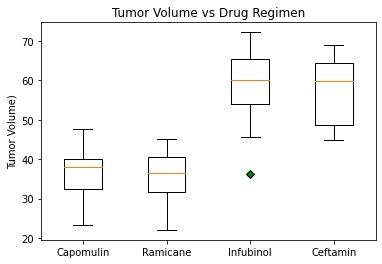

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
multi_plot=[vol_dat_Capomulin,vol_dat_Ramicane,vol_dat_Infubinol,vol_dat_Ceftamin]
ax1.set_title('Tumor Volume vs Drug Regimen')
ax1.set_ylabel('Tumor Volume)')
ax1.boxplot(multi_plot, labels=labels, flierprops=green_diamond)
plt.show()

In [22]:
 Only_Capomulin_outliners= Only_Capomulin.loc[(Only_Capomulin['Tumor Volume (mm3)'] < lower_bound_Capomulin)|
                                              (Only_Capomulin['Tumor Volume (mm3)'] > upper_bound_Capomulin)]
Only_Capomulin_outliners["Mouse ID"]

Series([], Name: Mouse ID, dtype: object)

In [23]:
 Only_Ramicane_outliners= Only_Ramicane.loc[(Only_Ramicane['Tumor Volume (mm3)'] < lower_bound_Ramicane)|
                                              (Only_Ramicane['Tumor Volume (mm3)'] > upper_bound_Ramicane)]
Only_Ramicane_outliners["Mouse ID"]

Series([], Name: Mouse ID, dtype: object)

In [24]:
 Only_Infubinol_outliners= Only_Infubinol.loc[(Only_Infubinol['Tumor Volume (mm3)'] < lower_bound_Infubinol)|
                                              (Only_Infubinol['Tumor Volume (mm3)'] > upper_bound_Infubinol)]
Only_Infubinol_outliners["Mouse ID"]

55    c326
Name: Mouse ID, dtype: object

In [25]:
 Only_Ceftamin_outliners= Only_Ceftamin.loc[(Only_Ceftamin['Tumor Volume (mm3)'] < lower_bound_Ceftamin)|
                                              (Only_Ceftamin['Tumor Volume (mm3)'] > upper_bound_Ceftamin)]
Only_Ceftamin_outliners["Mouse ID"]

Series([], Name: Mouse ID, dtype: object)

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [27]:
# Choosing a Mouse
Only_Capomulin["Mouse ID"]


0     b128
1     b742
2     f966
3     g288
4     g316
5     i557
6     i738
7     j119
8     j246
9     l509
10    l897
11    m601
12    m957
13    r157
14    r554
15    r944
16    s185
17    s710
18    t565
19    u364
20    v923
21    w150
22    w914
23    x401
24    y793
Name: Mouse ID, dtype: object

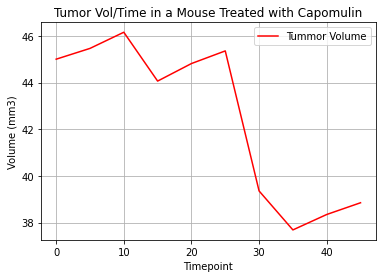

In [28]:
Only_One_Mouse_data= combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] == 'Capomulin') &
                                               (combined_mouse_data_df["Mouse ID"] == 'l897')] 

One_Mouse_TumorVol= Only_One_Mouse_data['Tumor Volume (mm3)'].values.tolist()  
One_Mouse_TimePoint= Only_One_Mouse_data['Timepoint'].values.tolist()  

plt.title("Tumor Vol/Time in a Mouse Treated with Capomulin")
plt.ylabel("Volume (mm3)")
plt.xlabel("Timepoint")
plt.plot(One_Mouse_TimePoint, One_Mouse_TumorVol, color='red', label="Tummor Volume")
plt.legend(loc="upper right")
plt.grid()


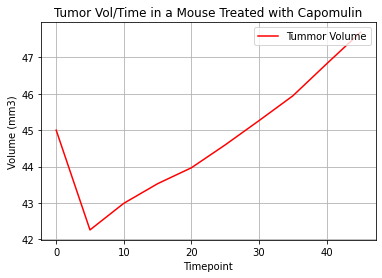

In [29]:
Only_One_Mouse_data= combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] == 'Capomulin') &
                                               (combined_mouse_data_df["Mouse ID"] == 'i557')] 

One_Mouse_TumorVol= Only_One_Mouse_data['Tumor Volume (mm3)'].values.tolist()  
One_Mouse_TimePoint= Only_One_Mouse_data['Timepoint'].values.tolist()  

plt.title("Tumor Vol/Time in a Mouse Treated with Capomulin")
plt.ylabel("Volume (mm3)")
plt.xlabel("Timepoint")
plt.plot(One_Mouse_TimePoint, One_Mouse_TumorVol, color='red', label="Tummor Volume")
plt.legend(loc="upper right")
plt.grid()


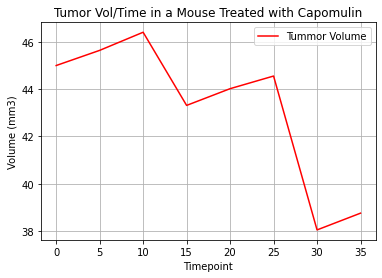

In [30]:
Only_One_Mouse_data= combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] == 'Capomulin') &
                                               (combined_mouse_data_df["Mouse ID"] == 'j246')] 

One_Mouse_TumorVol= Only_One_Mouse_data['Tumor Volume (mm3)'].values.tolist()  
One_Mouse_TimePoint= Only_One_Mouse_data['Timepoint'].values.tolist()  

plt.title("Tumor Vol/Time in a Mouse Treated with Capomulin")
plt.ylabel("Volume (mm3)")
plt.xlabel("Timepoint")
plt.plot(One_Mouse_TimePoint, One_Mouse_TumorVol, color='red', label="Tummor Volume")
plt.legend(loc="upper right")
plt.grid()


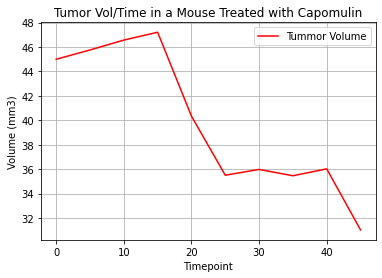

In [31]:
Only_One_Mouse_data= combined_mouse_data_df.loc[(combined_mouse_data_df["Drug Regimen"] == 'Capomulin') &
                                               (combined_mouse_data_df["Mouse ID"] == 'u364')] 

One_Mouse_TumorVol= Only_One_Mouse_data['Tumor Volume (mm3)'].values.tolist()  
One_Mouse_TimePoint= Only_One_Mouse_data['Timepoint'].values.tolist()  

plt.title("Tumor Vol/Time in a Mouse Treated with Capomulin")
plt.ylabel("Volume (mm3)")
plt.xlabel("Timepoint")
plt.plot(One_Mouse_TimePoint, One_Mouse_TumorVol, color='red', label="Tummor Volume")
plt.legend(loc="upper right")
plt.grid()


## Correlation and Regression

The correlation between both factors is 0.88


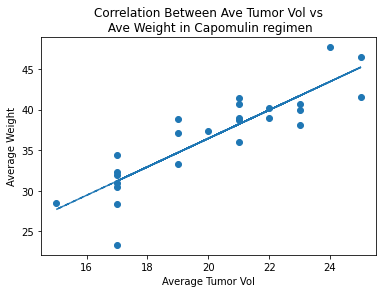

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Sort_data_mouse=Only_Capomulin.groupby(['Mouse ID']).agg({"Tumor Volume (mm3)":'mean',"Weight (g)":'mean'}).reset_index()

#Sort_data=Treatment_df.groupby(["Drug Regimen",'Mouse ID']).agg({"Timepoint":'max'})
Volume = Sort_data_mouse['Tumor Volume (mm3)']
Weight = Sort_data_mouse['Weight (g)']
correlation = st.pearsonr(Weight,Volume)
plt.scatter(Weight,Volume)
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(Weight,Volume)
m_fit = m_slope * Weight + m_int
plt.plot(Weight,m_fit,"--")
plt.xlabel('Average Tumor Vol')
plt.ylabel('Average Weight')
plt.title("Correlation Between Ave Tumor Vol vs\n Ave Weight in Capomulin regimen")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

